In [1]:
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
from sklearn.metrics import accuracy_score
iris=load_iris()

In [3]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [4]:
X=df
y=iris.target

In [5]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
import numpy as np
mean=np.mean(df['sepal length (cm)'])
std=np.std(df['sepal length (cm)'])

In [8]:
x=np.linspace(mean-3*std,mean+3*std,100)

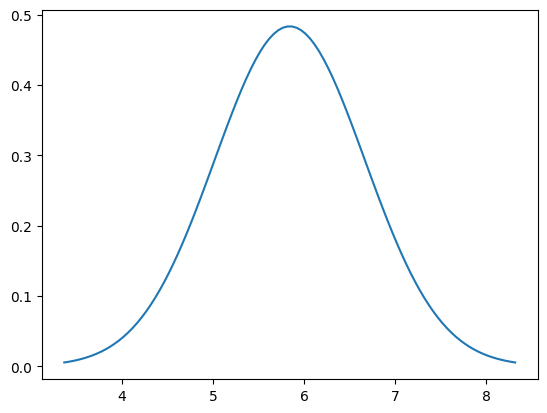

In [10]:
from scipy.stats import norm
import matplotlib.pyplot as plt
pdf=norm.pdf(x,mean,std)
plt.plot(x,pdf)

In [11]:
df['sepal length (cm)']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

In [13]:
# sns.distplot(df['sepal length (cm)'].normalise=True)

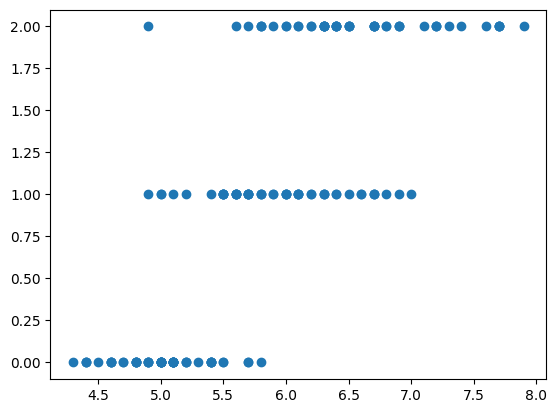

In [16]:
import seaborn as sns
plt.scatter(X['sepal length (cm)'],y)


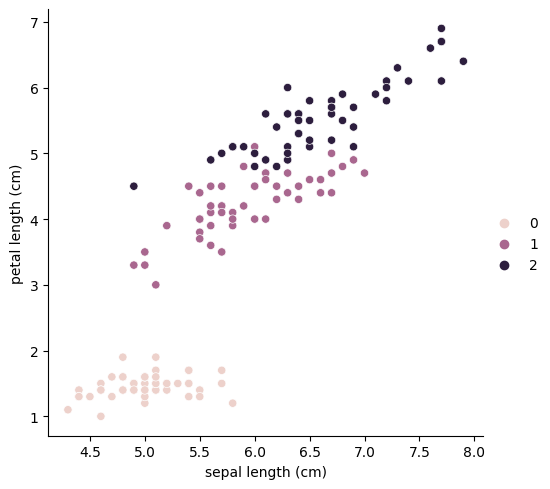

In [17]:
sns.relplot(x=X['sepal length (cm)'],y=X['petal length (cm)'],hue=y,data=df)

In [20]:

from sklearn.neighbors import KNeighborsClassifier

from mlxtend.feature_selection import SequentialFeatureSelector
model=KNeighborsClassifier(n_neighbors=6)
max_features=3
selected_features=SequentialFeatureSelector(model,
                                           k_features=max_features,
                                           cv=5,
                                           forward=True,
                                           scoring='accuracy')

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [25]:
selected_features.fit(X_train,y_train)

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=6),
                          k_features=(3, 3), scoring='accuracy')

In [26]:
selected_features.k_feature_names_

('sepal width (cm)', 'petal length (cm)', 'petal width (cm)')

In [27]:
finalmodel=KNeighborsClassifier(n_neighbors=6)
finalmodel.fit(X_train.iloc[:,list(selected_features.k_feature_idx_)],y_train)

KNeighborsClassifier(n_neighbors=6)

In [28]:
finalmodel.score(X_test.iloc[:,list(selected_features.k_feature_idx_)],y_test)

0.9777777777777777

In [29]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
model.predict(X_test)

array([2, 1, 2, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       2, 2, 1, 1, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       0])

In [31]:
model.score(X_test,y_test)

0.9555555555555556

In [32]:
error=[]
for i in range(1,40):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    pred_i=model.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

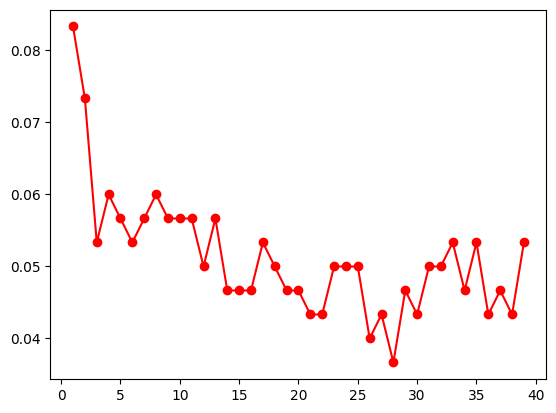

In [75]:
plt.plot(range(1,40),error,marker='o',color='red')

In [76]:

model=KNeighborsClassifier(n_neighbors=28)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=28)

In [77]:
model.score(X_test,y_test)

0.9633333333333334

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [49]:
df=pd.read_csv('Classified Data.txt',index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [51]:
scaler.fit(df.drop("TARGET CLASS",axis=1))

StandardScaler()

In [52]:
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))

In [53]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scaled_features,df['TARGET CLASS'],
                                              test_size=0.3)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [56]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [57]:
pred=knn.predict(X_test)

In [58]:
knn.score(X_test,y_test)

0.9166666666666666

In [59]:
error=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

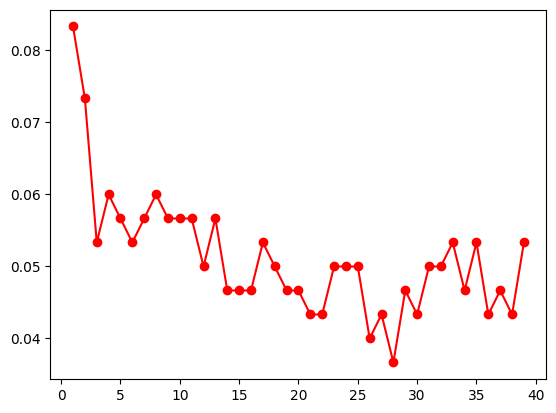

In [60]:
plt.plot(range(1,40),error,marker='o',color='red')

In [61]:
knn=KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=18)

In [62]:
knn.score(X_test,y_test)

0.95

# Linear regression selection

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression


In [ ]:
# Generate a random regression dataset with 10 features
X, y = make_regression(n_samples=100, n_features=10, random_state=42)


In [ ]:
model = LinearRegression()
# Create the forward feature selector
selector = SequentialFeatureSelector(model,
                                     k_features=5,
                                     forward=True,
                                     scoring='r2',
                                     cv=5)


In [ ]:
selector.fit(X, y)


In [ ]:
selected_feature_indices = selector.k_feature_idx_
selected_feature_names = selector.k_feature_names_

In [ ]:
selected_feature_names